In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('Rainfall.csv')
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [3]:
data.shape

(366, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [5]:
data.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [6]:
data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [7]:
data.columns = data.columns.str.strip()

In [8]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [10]:
data.drop(columns='day', axis=1, inplace=True)

In [11]:
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0])
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

In [12]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [13]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [14]:
data['rainfall'].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [15]:
data['rainfall'].replace({'yes':1, 'no':0}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11456\1616531474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rainfall'].replace({'yes':1, 'no':0}, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11456\1616531474.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['rainfall'].r

In [16]:
data['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [17]:
##EDA
sns.set(style="whitegrid")

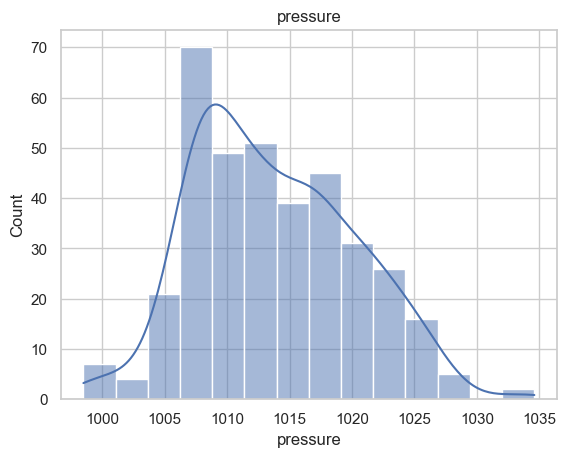

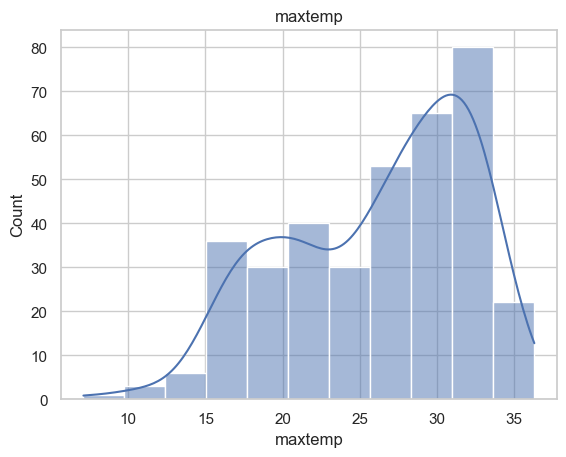

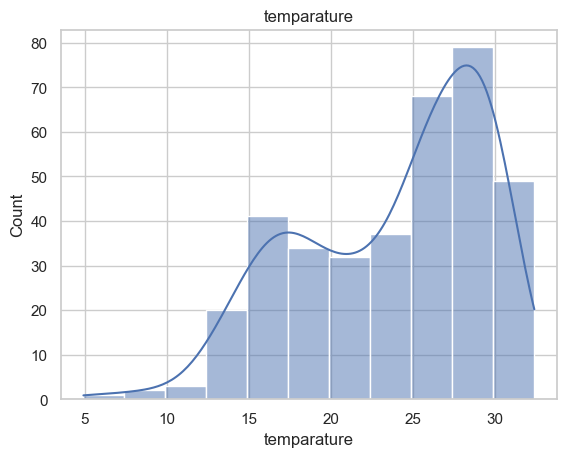

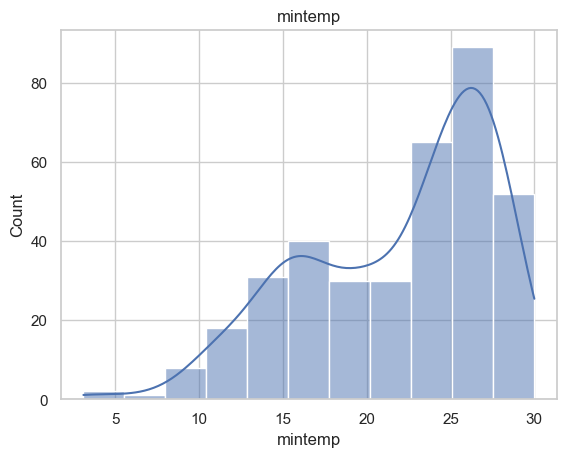

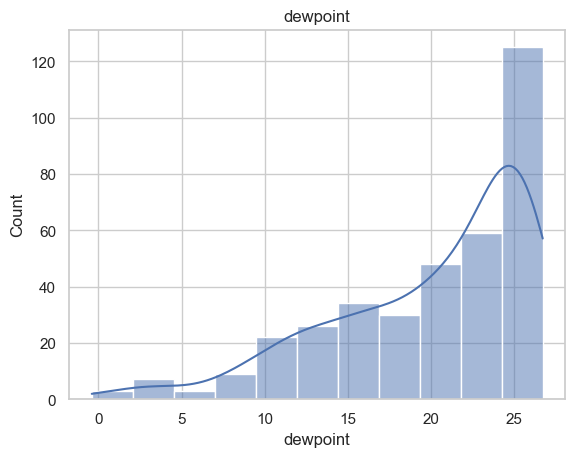

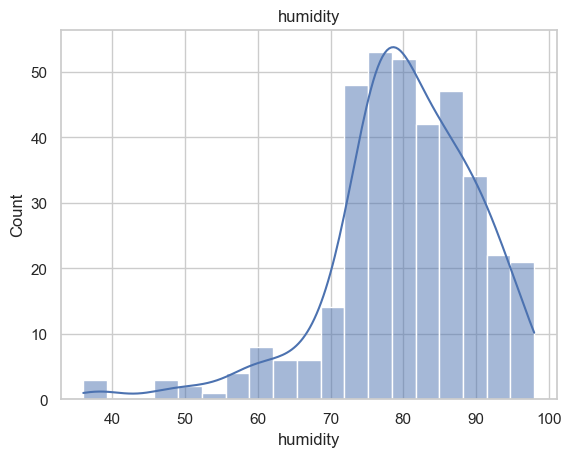

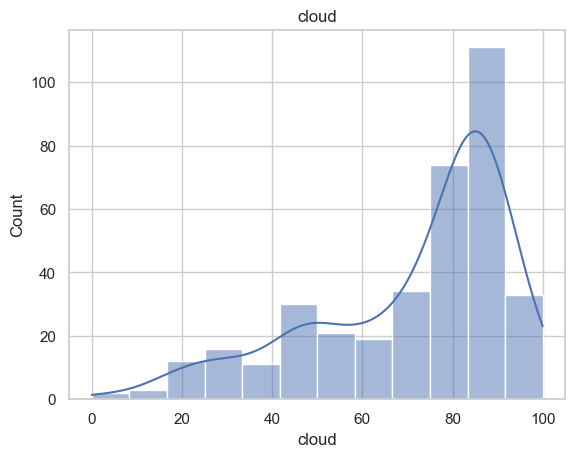

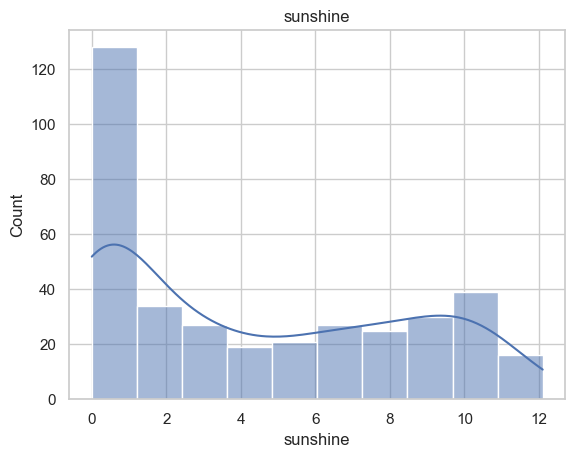

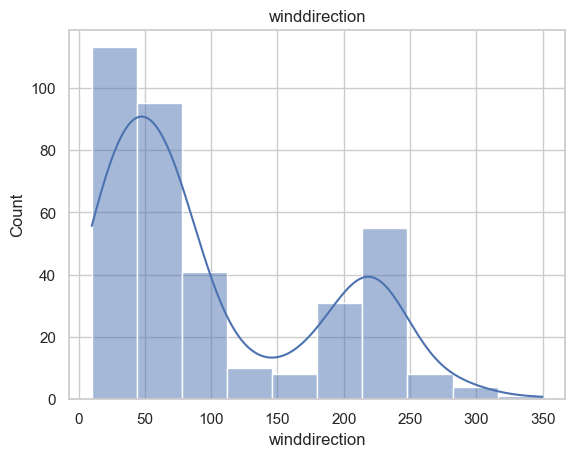

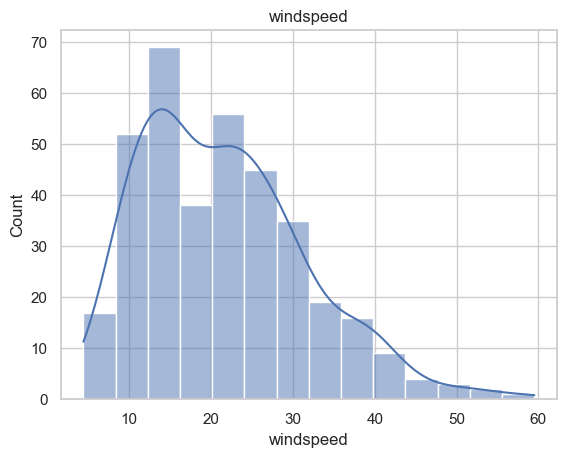

In [18]:
for col in data.columns:
    if col != 'rainfall':
        sns.histplot(data[col], kde=True)
        plt.title(col)
        plt.show()

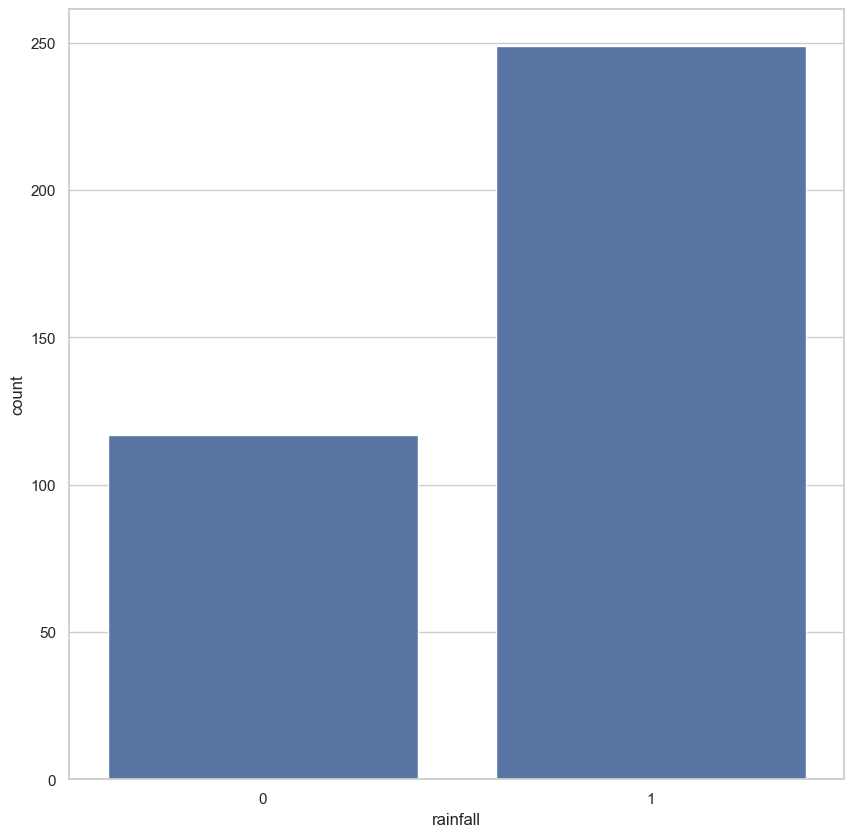

In [19]:
plt.figure(figsize=(10, 10))
sns.countplot(x=data['rainfall'])
plt.show()

In [20]:
correlation = data.corr()

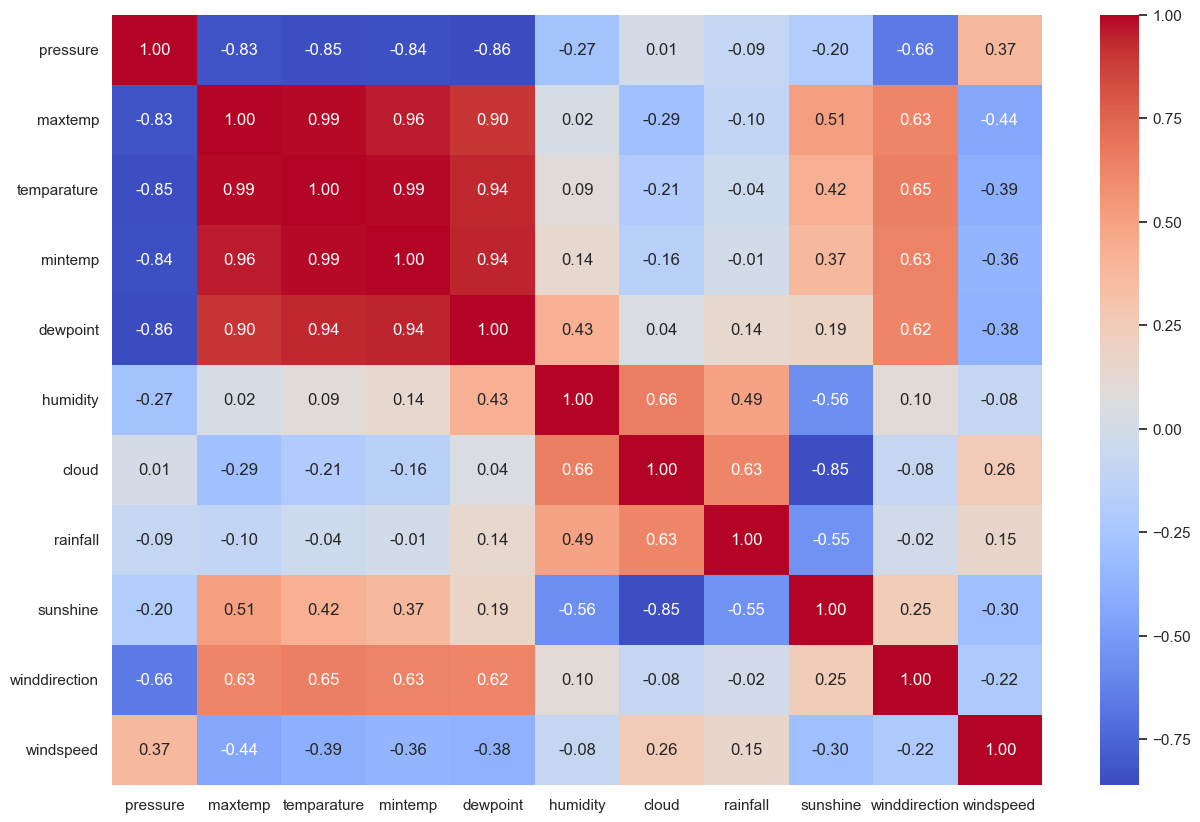

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

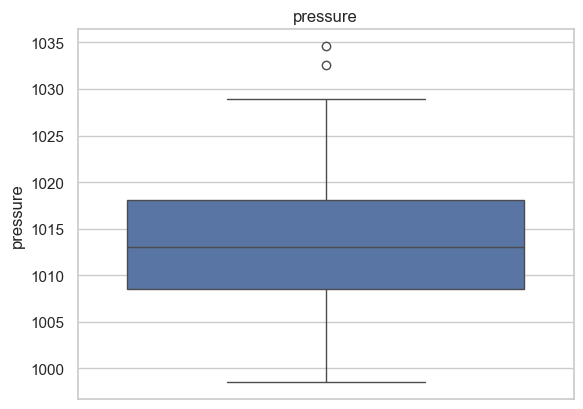

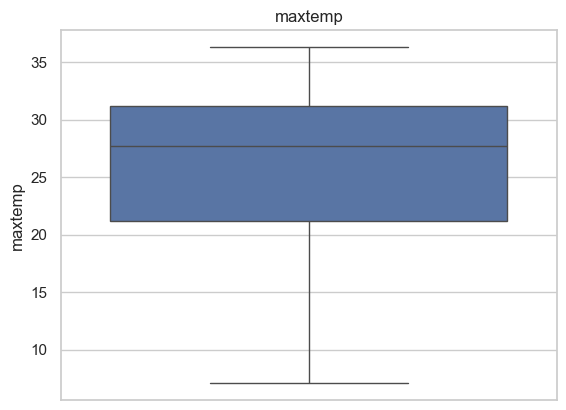

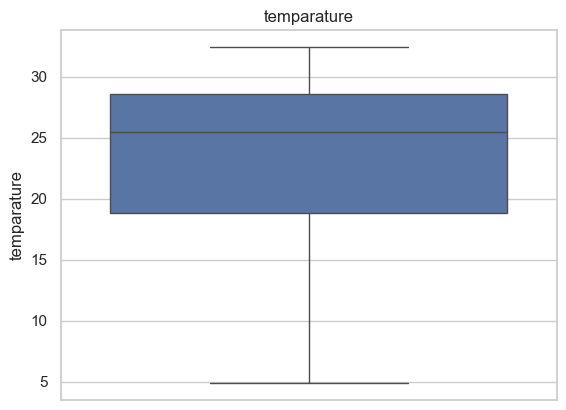

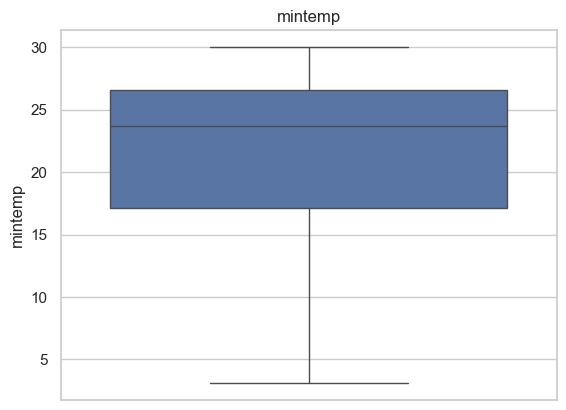

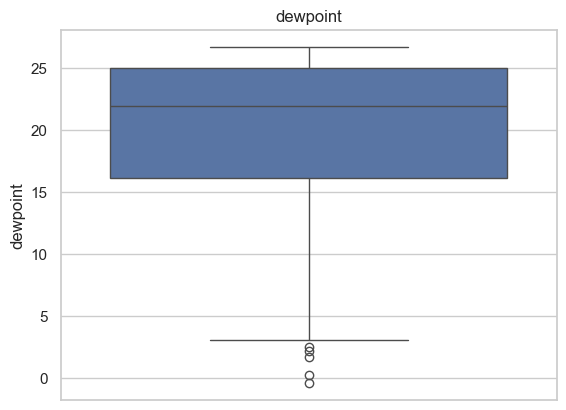

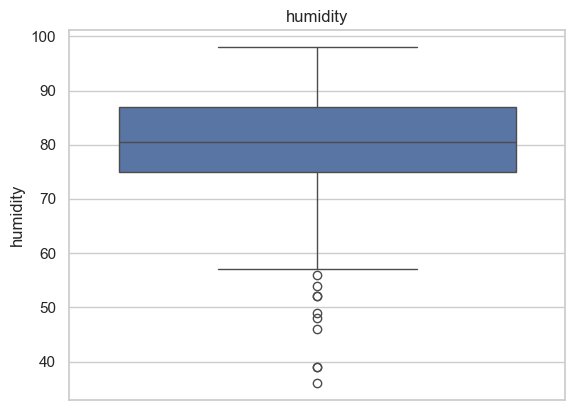

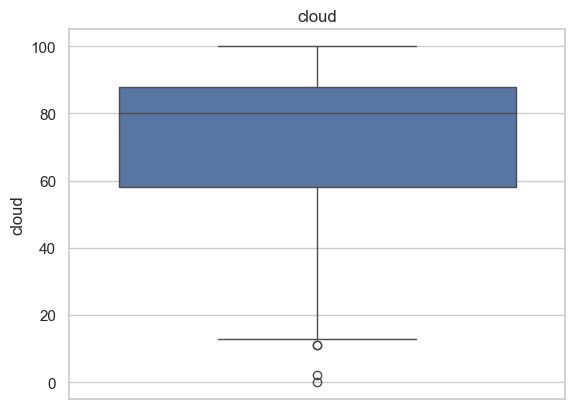

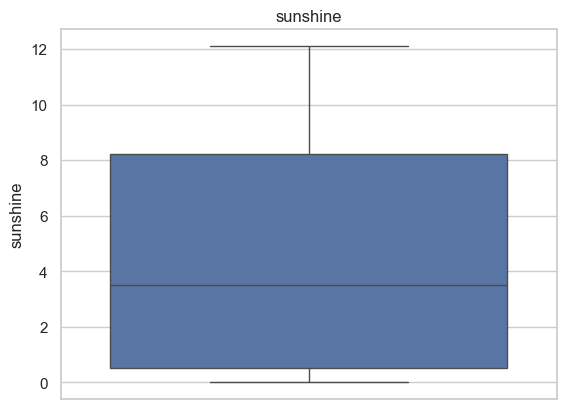

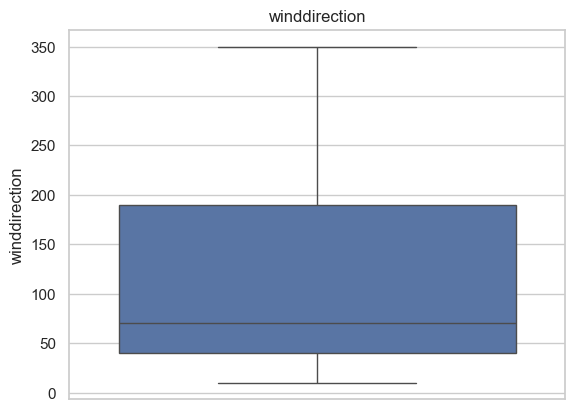

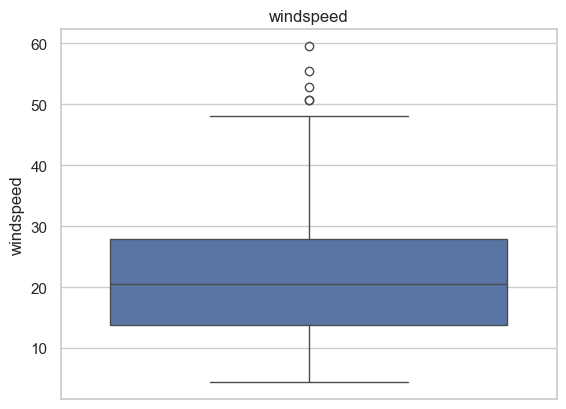

In [22]:
for col in data.columns:
    if col != 'rainfall':
        sns.boxplot(data[col])
        plt.title(col)
        plt.show()

In [23]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [24]:
data = data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [25]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [26]:
data['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [27]:
df_majority = data[data['rainfall']==1]
df_minority = data[data['rainfall']==0]

In [28]:
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [29]:
df_majority_downsampled.shape

(117, 8)

In [31]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [32]:
df_downsampled.shape

(234, 8)

In [33]:
X = data.drop(columns='rainfall')

In [34]:
y = data['rainfall']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
rf_model = RandomForestClassifier(random_state=42)
param_grid={
    "n_estimators":[50, 100, 200, 500],
    "max_features":["sqrt", "log2"],
    "max_depth":[None, 10, 20, 30],
    "min_samples_split":[2, 5, 10],
    "min_samples_leaf":[1, 2, 4],
    "bootstrap":[True, False]
}

In [37]:
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=2)

In [38]:
best_model = grid_search.best_estimator_
grid_search.best_score_

0.8358270017533606

In [39]:
grid_search.cv_results_

{'mean_fit_time': array([0.1563592 , 0.3028244 , 0.56772552, 1.22955971, 0.13502154,
        0.26394277, 0.57124052, 1.48813062, 0.12020736, 0.25844555,
        0.59292231, 1.23345203, 0.15063834, 0.29432282, 0.60315814,
        1.36385942, 0.11637063, 0.23655939, 0.53045187, 1.48570347,
        0.24097281, 0.25422387, 0.66049862, 1.46435275, 0.15594358,
        0.26188102, 0.72100234, 1.50613508, 0.1247263 , 0.27393236,
        0.7157392 , 1.75314531, 0.1992578 , 0.37975783, 0.68242373,
        1.43475871, 0.13827376, 0.54713778, 0.6780941 , 1.26105733,
        0.11927662, 0.28366976, 0.56187973, 1.26125884, 0.11743479,
        0.23503871, 0.45279622, 1.19471855, 0.12661567, 0.23590217,
        0.5035027 , 1.37618756, 0.13352451, 0.23745604, 0.50634308,
        1.12905293, 0.1456151 , 0.25380697, 0.54398799, 1.19412007,
        0.14481883, 0.28663173, 0.52332988, 1.22128339, 0.13499651,
        0.26382627, 0.48713231, 1.30604911, 0.11731052, 0.23237453,
        0.47261715, 1.25248809,